In [6]:
import tensorflow as tf
import sys
import numpy as np

In [2]:
## Sequential model

model_seq = tf.keras.Sequential(name = 'sequential model')
model_seq.add(tf.keras.Input(shape = (32,), name = 'inputs'))
model_seq.add(tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden1'))
model_seq.add(tf.keras.layers.Dense(32, activation='relu', name = 'hidden2'))
model_seq.add(tf.keras.layers.Dense(10, activation='softmax', name = 'output'))

model_seq.summary()

Model: "sequential model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 64)                2112      
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 4,522
Trainable params: 4,522
Non-trainable params: 0
_________________________________________________________________


In [6]:
## Functional model

inputs = tf.keras.layers.Input(shape = (32, ))
dense1 = tf.keras.layers.Dense(64, activation = 'relu')(inputs)
dense2 = tf.keras.layers.Dense(32, activation = 'relu')(dense1)
dense3 = tf.keras.layers.Dense(20, activation = 'relu')(dense1)
dense4 = tf.concat([dense2, dense3], axis = 1)
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(dense4)

model_fun = tf.keras.Model(inputs = inputs, outputs = outputs)

model_fun.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 64)           2112        ['input_4[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 32)           2080        ['dense_10[0][0]']               
                                                                                                  
 dense_12 (Dense)               (None, 20)           1300        ['dense_10[0][0]']               
                                                                                            

In [12]:
## Subclassing model

class mymodel(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__(name = 'mymodel')
        self.dense1 = tf.keras.layers.Dense(hidden1, activation = 'relu', name = 'hidden1')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x
    

Mymodel = mymodel(64, 32, 10)


In [13]:
Mymodel.build(input_shape=(1, 32))
Mymodel.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             multiple                  2112      
                                                                 
 dense_16 (Dense)            multiple                  2080      
                                                                 
 dense_17 (Dense)            multiple                  330       
                                                                 
Total params: 4,522
Trainable params: 4,522
Non-trainable params: 0
_________________________________________________________________


In [14]:
class model_sub(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(model_sub, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden1, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='softmax')
        
        
    def call(self, inputs):
        x = self.dense2(x)
        x = self.dense1(x)
        x = self.dense3(x)
        
        return x
    
    
Model_subclassing = model_sub(64, 32, 10)


In [ ]:
Model_subclassing.compile(loss = 'categorical_crossentropy',
                          optimizer = 'adam', metrics = 'acc')

Model_subclassing.fit(X_train, y_train, epochs=5, batch_size = 24,
                      callbacks=[checkpoint, early_stopping])

In [20]:
dataset = np.loadtxt('../../dataset/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

X = dataset[:, :-1]
y = dataset[:, -1]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# X_train.shape

class mymodel(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden1, activation='relu')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x 
    
    
model_indian = mymodel(12, 8, 1)
        

In [4]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./best_model.h5',
                                                verbose=1,
                                                save_best_only=True,
                                                save_weights_only=True)

earlystop = tf.keras.callbacks.EarlyStopping(patience=5)

In [29]:
model_indian.compile(loss = 'binary_crossentropy',
                     optimizer = 'adam',
                     metrics = 'acc')

history = model_indian.fit(X_train, y_train, validation_data = (X_test, y_test),
                       epochs = 100, batch_size = 24,
                       callbacks = [checkpoint, earlystop])

Epoch 1/100
 1/26 [>.............................] - ETA: 21s - loss: 6.3704 - acc: 0.4583
Epoch 1: val_loss improved from inf to 1.15443, saving model to .\best_model.h5
26/26 [==============================] - 1s 10ms/step - loss: 2.2352 - acc: 0.6091 - val_loss: 1.1544 - val_acc: 0.5779
Epoch 2/100
 1/26 [>.............................] - ETA: 0s - loss: 1.4160 - acc: 0.4583
Epoch 2: val_loss improved from 1.15443 to 0.92745, saving model to .\best_model.h5
26/26 [==============================] - 0s 3ms/step - loss: 1.0518 - acc: 0.5130 - val_loss: 0.9274 - val_acc: 0.4805
Epoch 3/100
 1/26 [>.............................] - ETA: 0s - loss: 0.8315 - acc: 0.5417
Epoch 3: val_loss improved from 0.92745 to 0.92696, saving model to .\best_model.h5
26/26 [==============================] - 0s 3ms/step - loss: 0.8999 - acc: 0.4511 - val_loss: 0.9270 - val_acc: 0.4221
Epoch 4/100
 1/26 [>.............................] - ETA: 0s - loss: 0.7406 - acc: 0.4583
Epoch 4: val_loss improved from 0

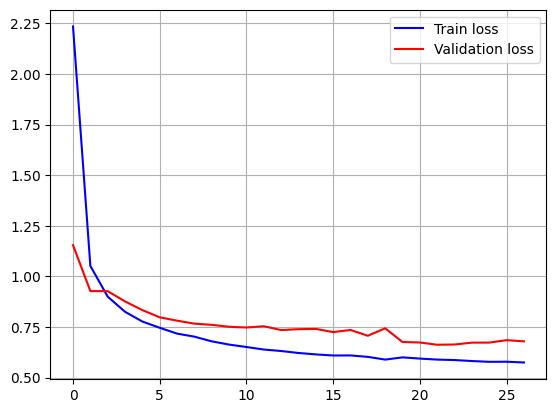

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label = 'Train loss')
plt.plot(history.history['val_loss'], 'r', label = 'Validation loss')
plt.legend()
plt.grid()
plt.show()


In [2]:
model_indian.load_weights('./best_model.h5')

NameError: name 'model_indian' is not defined

In [5]:
model = mymodel(12, 8, 1)

In [15]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

# print(samples)
targets = [[1], [0], [1], [1], [0], [1]]

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

In [13]:
display(samples)
display(sequences)
print(tokenizer.word_index)

['너 오늘 이뻐 보인다',
 '나는 오늘 기분이 더러워',
 '끝내주는데, 좋은 일이 있나봐',
 '나 좋은 일이 생겼어',
 '아 오늘 진짜 짜증나',
 '환상적인데, 정말 좋은거 같아']

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [17]:
labels = np.array(targets)
labels

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [23]:
batch_size = 2
epochs = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

emb_size = 128
hidden_dim = 256
output_dim = 1

In [29]:
## Sequential API
model_seq = tf.keras.Sequential(name = 'Sequential')
model_seq.add(tf.keras.layers.Input(shape = (4,)))
model_seq.add(tf.keras.layers.Embedding(vocab_size, emb_size))
model_seq.add(tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)))
model_seq.add(tf.keras.layers.Dense(hidden_dim, activation = 'relu'))
model_seq.add(tf.keras.layers.Dense(output_dim, activation = 'sigmoid'))


# model_seq = tf.keras.Sequential(
# [tf.keras.layers.Input(shape = (4,)),
# tf.keras.layers.Embedding(vocab_size, emb_size),
# tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)),
# tf.keras.layers.Dense(hidden_dim, activation = 'relu'),
# tf.keras.layers.Dense(output_dim, activation = 'sigmoid')])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 128)            2688      
                                                                 
 lambda_2 (Lambda)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_seq = tf.keras.Sequential(name = 'Sequential')
model_seq.add(tf.keras.layers.Input(shape = (4,)))
model_seq.add(tf.keras.layers.Embedding(vocab_size, emb_size))
model_seq.add(tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)))
model_seq.add(tf.keras.layers.Dense(hidden_dim, activation = 'relu'))
model_seq.add(tf.keras.layers.Dense(output_dim, activation = 'sigmoid'))

NameError: name 'x' is not defined

In [27]:
sequences
targets

[[1], [0], [1], [1], [0], [1]]

In [28]:
model_seq.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = 'acc')

model_seq.fit(sequences, targets, epochs=epochs,
              batch_size = batch_size)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 0.6907 - acc: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6718 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6577 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6409 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6197 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5978 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5705 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5392 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5046 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4606 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4184 

In [32]:
inputs = tf.keras.layers.Input(shape = (4, ))
emb_out = tf.keras.layers.Embedding(vocab_size, 200)(inputs)
mean_out = tf.reduce_mean(emb_out, axis = 1)
hidden1 = tf.keras.layers.Dense(hidden_dim, activation='relu')(mean_out)
outputs = tf.keras.layers.Dense(output_dim, activation='sigmoid')(hidden1)

model_functional = tf.keras.Model(inputs, outputs)
model_functional.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding_5 (Embedding)     (None, 4, 200)            4200      
                                                                 
 tf.math.reduce_mean_1 (TFOp  (None, 200)              0         
 Lambda)                                                         
                                                                 
 dense_12 (Dense)            (None, 256)               51456     
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 55,913
Trainable params: 55,913
Non-trainable params: 0
_______________________________________________________

In [39]:
class model_sub(tf.keras.Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs):
        super(model_sub, self).__init__()
        self.emb = tf.keras.layers.Embedding(vocab_size, emb_size)
        self.hidden = tf.keras.layers.Dense(hidden, activation='relu')
        self.outputs = tf.keras.layers.Dense(outputs, activation='sigmoid')
        
    def call(self, inputs):
        x = self.emb(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.hidden(x)
        x = self.outputs(x)
        
        return x  
    
Mymodel_sub = model_sub(vocab_size, emb_size, hidden_dim, output_dim)



In [40]:
Mymodel_sub.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam', 
                    metrics = 'acc')

Mymodel_sub.fit(sequences, targets, epochs = epochs, batch_size = batch_size)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.6921 - acc: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6761 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6586 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6419 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6234 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6025 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5733 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5434 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5052 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4650 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4181 

In [41]:
import sklearn

print(sklearn.__version__)

1.2.2


In [42]:
from sklearn.datasets import load_iris
import pandas as pd

In [46]:
iris_data = load_iris()
print(type(iris_data))

iris_data.keys()

<class 'sklearn.utils._bunch.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
# print(iris_data['data'])
# print(iris_data['target'])
print(iris_data['feature_names'])
print(iris_data['target_names'])



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [54]:
iris = pd.DataFrame(iris_data['data'])
iris.head()
iris['target'] = iris_data['target']
iris.head()
iris.columns = ["sepal length","sepal width",'petal length','petal width','class']
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
setosa = iris[iris['class'] == 0]
versicolor = iris[iris['class'] == 1]
virginica = iris[iris['class'] == 2]

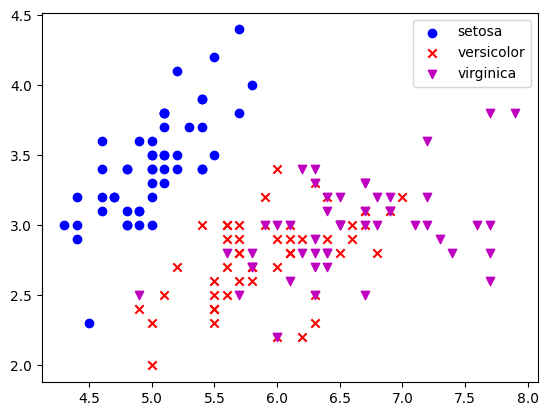

In [58]:
import matplotlib.pyplot as plt
plt.scatter(setosa['sepal length'], setosa['sepal width'],
            marker = 'o', color = 'b', label = 'setosa')
plt.scatter(versicolor['sepal length'], versicolor['sepal width'],
            marker = 'x', color = 'r', label = 'versicolor')
plt.scatter(virginica['sepal length'], virginica['sepal width'],
            marker = 'v', color = 'm', label = 'virginica')

plt.legend()
plt.show()

In [60]:
## knn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [63]:
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'],
                                                    test_size=0.2)

X_train.shape

(120, 4)

In [64]:
## 
ss = StandardScaler()
ss.fit(X_train)
Train_scaled = ss.transform(X_train)
Test_scaled = ss.transform(X_test)


In [65]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': range(1, 10)}
gs_knn = GridSearchCV(estimator=knn,
                      param_grid=param_knn,
                      scoring='accuracy', cv = 5, n_jobs= -1)
gs_knn.fit(Train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, scoring='accuracy')

In [66]:
print(gs_knn.best_estimator_)
print(gs_knn.best_score_)

KNeighborsClassifier(n_neighbors=9)
0.9833333333333334


In [67]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(Train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [69]:
knn.score(Test_scaled, y_test)

0.9333333333333333